In [2]:
# Step 1: Import libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [15]:
# Step 2: Define paths
train_dir = "../data/Classification/Training"
test_dir = "../data/Classification/Testing"

In [16]:
# Step 3: Image parameters
img_height, img_width = 150, 150
batch_size = 32


In [17]:
# Step 4: Data augmentation (only for training)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2 # automatically create validation split
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [18]:
# Step 5: Load training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [19]:
# Step 6: Load testing dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 1311 images belonging to 4 classes.


Class labels: ['glioma', 'meningioma', 'notumor', 'pituitary']


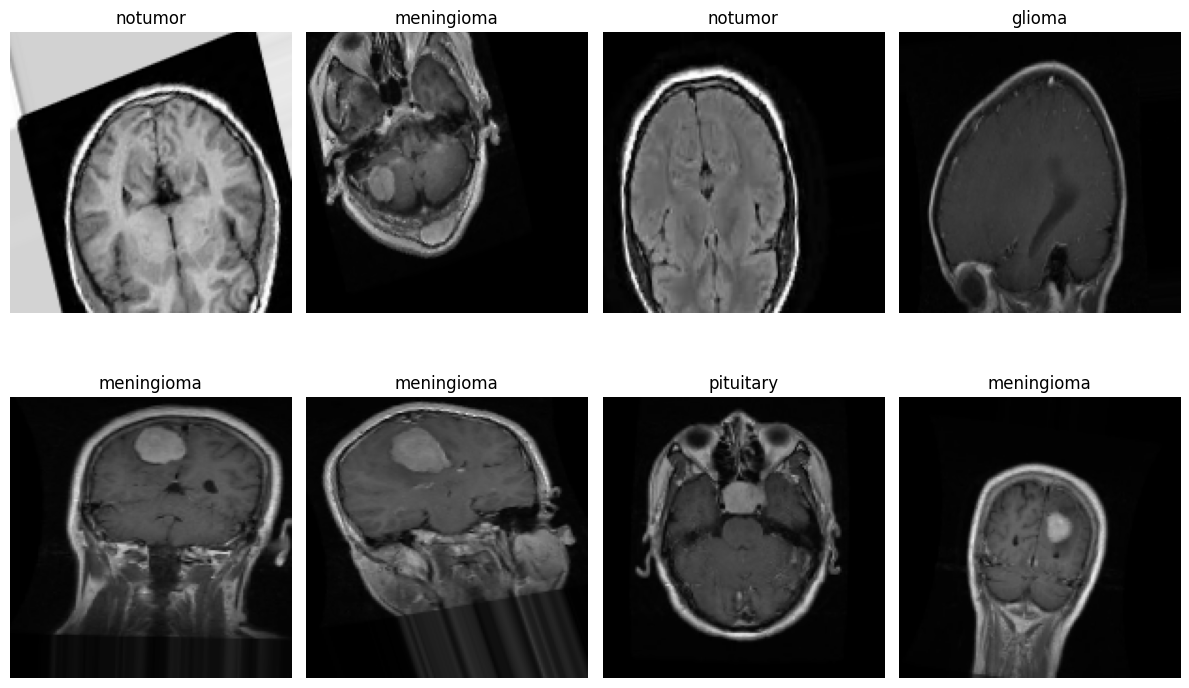

In [22]:
# Step 7: Visualize some training images
class_labels = list(train_generator.class_indices.keys())
print("Class labels:", class_labels)

# Get a batch of images and labels
images, labels = next(train_generator)

plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].argmax()])
    plt.axis("off")
plt.tight_layout()
plt.show()